# Teste Cientista de Dados

Instruções básicas: Utilize um ambiente de desenvolvimento Jupyter com kernel Python 3+. Para solucionar os desafios, utilize de quaisquer bibliotecas que julgar necessário, a menos que o enunciado especifique o contrário. Fique a vontade para utilizar um ambiente de desenvolvimento local ou remoto (exemplo: Google Colab). A entrega deve ser o próprio arquivo de notebook, no seguinte padrão: nome- sobrenome.ipynb

* Sabemos que o processo de desenvolvimento pode ser demorado, e a busca de melhores parâmetros para modelos é algo que exige processamento, na prova iremos avaliar muito mais a metodologia empregada, do que o resultado do modelo em si.

In [ ]:
#######################################################################################################
# ESSA CÉLULA INTEIRA É UMA CÓPIA DE UMA LIB QUE ENCONTREI NA INTERNET PARA VISUALIZAR
# AS LAYERS E PESOS DE CADA NODE DE UMA REDE NEURAL.

# COPIEI TODO O CÓDIGO AQUI PRA NÃO PRECISAR ENVIAR ARQUIVO EXTRA JUNTO COM ESSAS FUNÇÕES,
# ALÉM DESSE NOTEBOOK COM AS RESPOSTAS.

# ACHEI INTERESSANTE UTILIZAR ISSO PARA TER UMA NOÇÃO VISUAL DO QUE A REDE NEURAL TREINADA FAZ,
# JÁ QUE É UM MODELO COM MUITO POUCA INTERPRETABILIDADE.

# FONTE DESSE CÓDIGO: http://www.jzliu.net/blog/simple-python-library-visualize-neural-network/
#######################################################################################################


# This Libraray is modified based the work by Milo Spencer-Harper and Oli Blum, https://stackoverflow.com/a/37366154/10404826
# On top of that, I added support for showing weights (linewidth, colors, etc.)
# Contributor: Jianzheng Liu
# Contact: jzliu.100@gmail.com

from matplotlib import pyplot
from math import cos, sin, atan
from palettable.tableau import Tableau_10
from time import localtime, strftime
import numpy as np

class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius, id=-1):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)
        pyplot.gca().text(self.x, self.y-0.15, str(id), size=10, ha='center')

class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2, weight=0.4, textoverlaphandler=None):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)

        # assign colors to lines depending on the sign of the weight
        color=Tableau_10.mpl_colors[0]
        if weight > 0: color=Tableau_10.mpl_colors[1]

        # assign different linewidths to lines depending on the size of the weight
        abs_weight = abs(weight)
        if abs_weight > 0.5:
            linewidth = 10*abs_weight
        elif abs_weight > 0.8:
            linewidth =  100*abs_weight
        else:
            linewidth = abs_weight

        # draw the weights and adjust the labels of weights to avoid overlapping
        if abs_weight > 0.5:
            # while loop to determine the optimal locaton for text lables to avoid overlapping
            index_step = 2
            num_segments = 10
            txt_x_pos = neuron1.x - x_adjustment+index_step*(neuron2.x-neuron1.x+2*x_adjustment)/num_segments
            txt_y_pos = neuron1.y - y_adjustment+index_step*(neuron2.y-neuron1.y+2*y_adjustment)/num_segments
            while ((not textoverlaphandler.getspace([txt_x_pos-0.5, txt_y_pos-0.5, txt_x_pos+0.5, txt_y_pos+0.5])) and index_step < num_segments):
                index_step = index_step + 1
                txt_x_pos = neuron1.x - x_adjustment+index_step*(neuron2.x-neuron1.x+2*x_adjustment)/num_segments
                txt_y_pos = neuron1.y - y_adjustment+index_step*(neuron2.y-neuron1.y+2*y_adjustment)/num_segments

            # print("Label positions: ", "{:.2f}".format(txt_x_pos), "{:.2f}".format(txt_y_pos), "{:3.2f}".format(weight))
            a=pyplot.gca().text(txt_x_pos, txt_y_pos, "{:3.2f}".format(weight), size=8, ha='center')
            a.set_bbox(dict(facecolor='white', alpha=0))
            # print(a.get_bbox_patch().get_height())

        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment), linewidth=linewidth, color=color)
        pyplot.gca().add_line(line)

    def draw(self, layerType=0, weights=None, textoverlaphandler=None):
        j=0 # index for neurons in this layer
        for neuron in self.neurons:
            i=0 # index for neurons in previous layer
            neuron.draw( self.neuron_radius, id=j+1 )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron, weights[i,j], textoverlaphandler)
                    i=i+1
            j=j+1

        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

# A class to handle Text Overlapping
# The idea is to first create a grid space, if a grid is already occupied, then
# the grid is not available for text labels.
class TextOverlappingHandler():
    # initialize the class with the width and height of the plot area
    def __init__(self, width, height, grid_size=0.2):
        self.grid_size = grid_size
        self.cells = np.ones((int(np.ceil(width / grid_size)), int(np.ceil(height / grid_size))), dtype=bool)

    # input test_coordinates(bottom left and top right),
    # getspace will tell you whether a text label can be put in the test coordinates
    def getspace(self, test_coordinates):
        x_left_pos = int(np.floor(test_coordinates[0]/self.grid_size))
        y_botttom_pos = int(np.floor(test_coordinates[1]/self.grid_size))
        x_right_pos = int(np.floor(test_coordinates[2]/self.grid_size))
        y_top_pos = int(np.floor(test_coordinates[3]/self.grid_size))
        if self.cells[x_left_pos, y_botttom_pos] and self.cells[x_left_pos, y_top_pos] \
        and self.cells[x_right_pos, y_top_pos] and self.cells[x_right_pos, y_botttom_pos]:
            for i in range(x_left_pos, x_right_pos):
                for j in range(y_botttom_pos, y_top_pos):
                    self.cells[i, j] = False

            return True
        else:
            return False

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self, weights_list=None):
        # vertical_distance_between_layers and horizontal_distance_between_neurons are the same with the variables of the same name in layer class
        vertical_distance_between_layers = 6
        horizontal_distance_between_neurons = 2
        overlaphandler = TextOverlappingHandler(\
            self.number_of_neurons_in_widest_layer*horizontal_distance_between_neurons,\
            len(self.layers)*vertical_distance_between_layers, grid_size=0.2 )

        pyplot.figure(figsize=(20, 100))
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == 0:
                layer.draw( layerType=0 )
            elif i == len(self.layers)-1:
                layer.draw( layerType=-1, weights=weights_list[i-1], textoverlaphandler=overlaphandler)
            else:
                layer.draw( layerType=i, weights=weights_list[i-1], textoverlaphandler=overlaphandler)

        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        figureName='ANN_'+strftime("%Y%m%d_%H%M%S", localtime())+'.png'
        pyplot.savefig(figureName, dpi=300, bbox_inches="tight")
        pyplot.show()

class DrawNN():
    # para: neural_network is an array of the number of neurons
    # from input layer to output layer, e.g., a neural network of 5 nerons in the input layer,
    # 10 neurons in the hidden layer 1 and 1 neuron in the output layer is [5, 10, 1]
    # para: weights_list (optional) is the output weights list of a neural network which can be obtained via classifier.coefs_
    def __init__( self, neural_network, weights_list=None ):
        self.neural_network = neural_network
        self.weights_list = weights_list
        # if weights_list is none, then create a uniform list to fill the weights_list
        if weights_list is None:
            weights_list=[]
            for first, second in zip(neural_network, neural_network[1:]):
                tempArr = np.ones((first, second))*0.4
                weights_list.append(tempArr)
            self.weights_list = weights_list

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw(self.weights_list)

## Início do meu código propriamente dito

### 1. Utilize o dataset existente em https://www.kaggle.com/fedesoriano/stroke-prediction-dataset como base para realizar a prova.

In [ ]:
# algumaS bibliotecas que tive que instalar, pois nao estavam no pacote default do Google Colab
!pip install shap
!pip install imblearn

     |████████████████████████████████| 356 kB 4.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491664 sha256=81a1c096d076f5a8f4f6398896a97404565ecfa6e3d82092f3bef0c33bb41ef6
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
# import de todas as bibliotecas necessarias:
import numpy as np
import pandas as pd

# bibliotecas para geracao de graficos:
import seaborn as sns
import matplotlib.pyplot as plt

# bibliotecas para pre-processamento:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

# bibliotecas para treino de modelos:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# bibliotecas para reducao de dimensionalidade:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# bibliotecas com diversos modelos diferentes:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# bibliotecas para otimizacao de hiper-parametros:
from sklearn.model_selection import GridSearchCV

# bibliotecas para avaliacao de modelos:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# bibliotecas para interpretacao de modelos:
import shap

# biblioteca e comando para desabilitar warnings, pois alguns modelos apresentam warnings de convergencia:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# efetuei download do dataset direto do site do Kaggle e salvei no mesmo diretorio onde estou trabalhando:

# leitura do arquivo .CSV:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# verificacao do tamanho do dataset:
df.shape

(5110, 12)

### 2. Realize uma análise exploratória, utilizando de gráficos e análises estatísticas, para indicar o comportamento dos dados, inclusive dados faltantes. Assuma o completo desconhecimento da base de dados e procure quaisquer pontos relevantes para uma futura etapa de modelagem.

* Não se limite nessa análises, nos mostre o que você considera importante em uma análise exploratória

In [ ]:
# primeiro, vou verificar os tipos de cada coluna e ajustar, se necessario:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# modificando tipos das colunas, pois algumas estao em um tipo que vai ficar pior pra trabalhar:

# colunas binarias devem ser categoricas, nao numericas, pra facilitar a analise exploratoria (incluindo a variavel alvo, stroke):
df['hypertension'] = df['hypertension'].astype(str)
df['heart_disease'] = df['heart_disease'].astype(str)
df['stroke'] = df['stroke'].astype(str)

In [ ]:
# vou dar uma olhada geral nas estatisticas do dataset:

# colunas numericas:
df.describe(include=np.number)

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


In [ ]:
# colunas categoricas:
df.describe(include=object)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


### **Anotações até o momento**:
* A maioria das colunas não apresenta *missing values*;
* Única coluna com dados faltantes é a **bmi**;
* Parece existir idades fracionárias (pode ser bom tratar isso);
* Existem 3 tipos de **gender**;
* Aparentemente, muitas colunas apresentam uma distribuição desbalanceada, inclusive a variavél alvo, então é algo importante para ficar de olho;

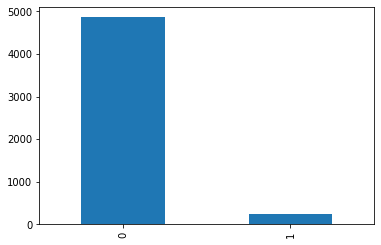

In [ ]:
# comecando as analises univariadas de cada coluna:

# variavel alvo (stroke):
df['stroke'].value_counts(dropna=False).plot(kind='bar');

### **Anotações até o momento**:
* Variável alvo é extremamente desbalanceada;
* Será necessário utilizar alguma técnica de *Oversampling* para tratar esse desbalanceamento;

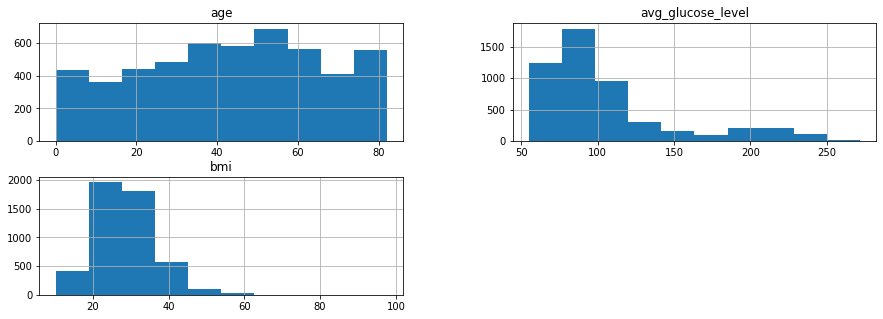

In [ ]:
# analise univariada das colunas numericas:

fig, ax = plt.subplots(figsize=(15,5))

num_cols = ['age', 'avg_glucose_level',	'bmi']

# utilizando o histograma do proprio pandas pra deixar mais rapida a analise, mas poderiam ser usadas outras opcoes:
df[num_cols].hist(ax=ax);

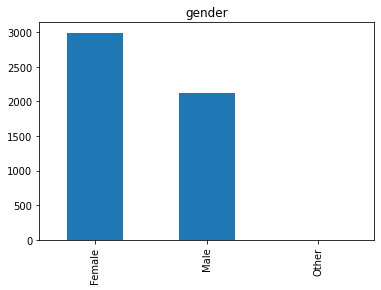

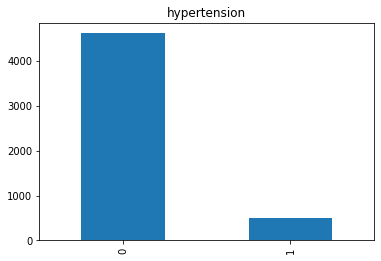

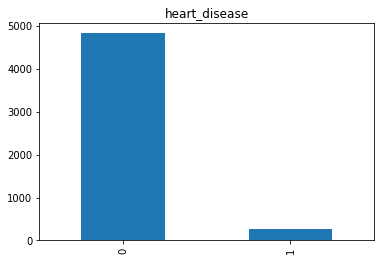

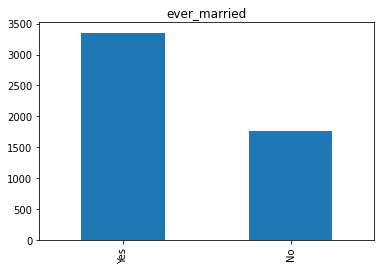

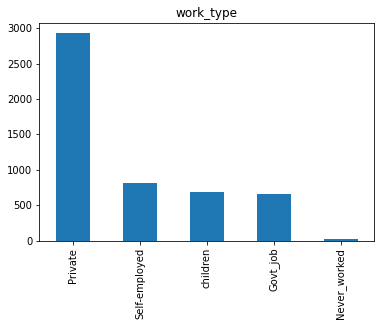

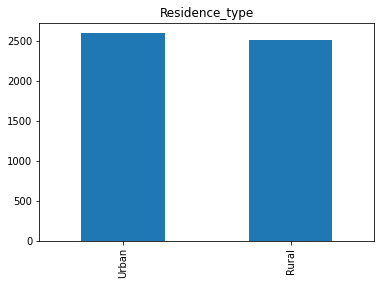

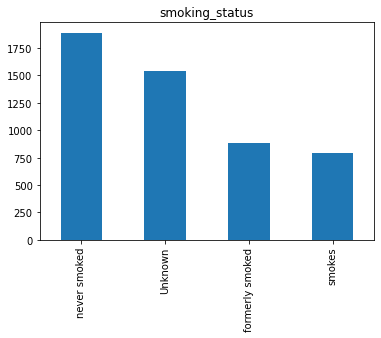

In [ ]:
# analise univariada das colunas categoricas:

cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# utilizando o plot do proprio pandas pra deixar mais rapida a analise, mas poderiam ser usadas outras opcoes:
for col in cat_cols:
  df[col].value_counts(dropna=False).plot.bar();
  plt.title(col);
  plt.show();

### **Anotações até o momento**:
* Existem alguns registros com o **gender** igual a **Other**. Pode ser uma boa ideia removê-los do dataset (a se pensar);
* Colunas **hypertension** e **heart_disease** são desbalanceadas (grande maioria dos pacientes não apresenta a hiper-tensão nem doença do coração);
* Coluna **smoking_status** apresenta a categoria **Unknown** que, segundo a documentação no site do Kaggle, representa indivíduos em que essa informação não foi informada ou é desconhecida. Como é uma parcela significativa do dataset com essa categoria, não será viável remover esses casos. Terei que tragar isso de alguma maneira (a se pensar).

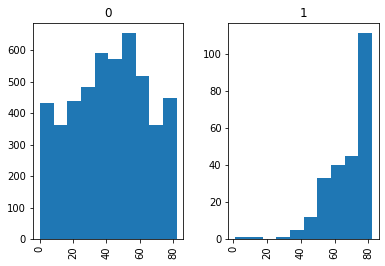

In [ ]:
# fazendo agora as analises bivariadas entre cada coluna com a variavel alvo:

# colunas numericas:
# idade:
df['age'].hist(by=df['stroke']);

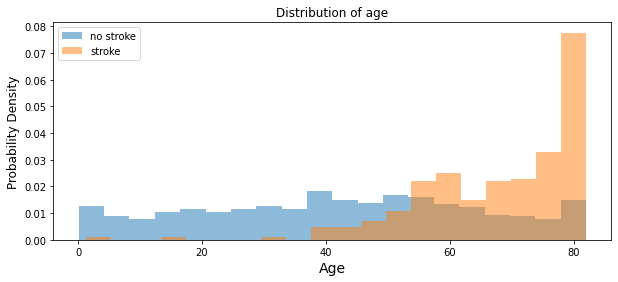

In [ ]:
# agora usando o histograma do matplotlib, pois os graficos acima nao ajudaram muito:
plt.figure(figsize=(10,4))

df_0 = df.query("stroke == '0' ")['age']
df_1 = df.query("stroke == '1' ")['age']

plt.hist(df_0, bins=20, alpha=0.5, density=True, label="no stroke");
plt.hist(df_1, bins=20, alpha=0.5, density=True, label="stroke");

plt.xlabel("Age", size=14)
plt.ylabel("Probability Density", size=12)
plt.title("Distribution of age")
plt.legend(loc='upper left')

plt.show()

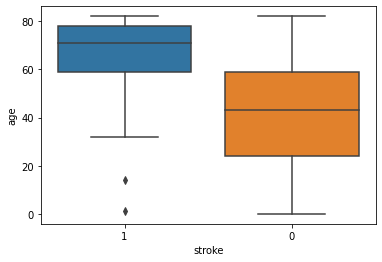

In [ ]:
sns.boxplot(data=df, x='stroke', y='age');

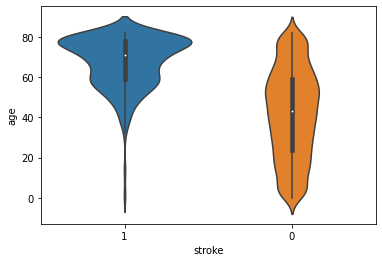

In [ ]:
# tentativa de visualizar a distribuicao de cada classe e o volume de pontos de cada uma:

# esse grafico demora muito pra renderizar, entao achei melhor deixar comentado:
#sns.swarmplot(data=df, x='stroke', y='age');

sns.violinplot(data=df, x='stroke', y='age');

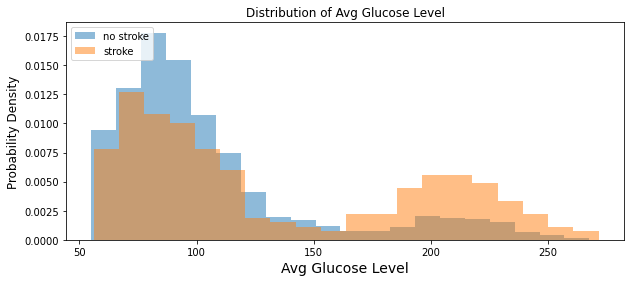

In [ ]:
# nivel medio de glicose:

#df['avg_glucose_level'].hist(by=df['stroke']);

plt.figure(figsize=(10,4))

df_0 = df.query("stroke == '0' ")['avg_glucose_level']
df_1 = df.query("stroke == '1' ")['avg_glucose_level']

plt.hist(df_0, bins=20, alpha=0.5, density=True, label="no stroke");
plt.hist(df_1, bins=20, alpha=0.5, density=True, label="stroke");

plt.xlabel("Avg Glucose Level", size=14)
plt.ylabel("Probability Density", size=12)
plt.title("Distribution of Avg Glucose Level")
plt.legend(loc='upper left')

plt.show()

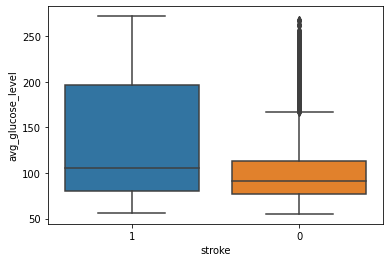

In [ ]:
sns.boxplot(data=df, x='stroke', y='avg_glucose_level');

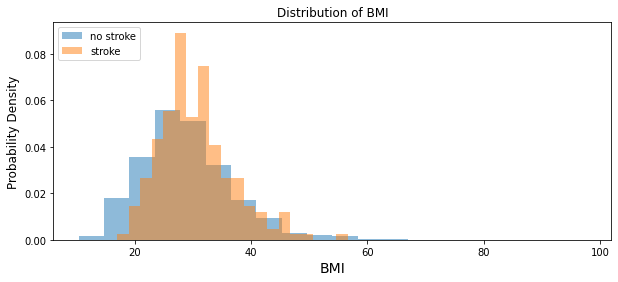

In [ ]:
# IMC:

#df['bmi'].hist(by=df['stroke']);

plt.figure(figsize=(10,4))

df_0 = df.query("stroke == '0' ")['bmi']
df_1 = df.query("stroke == '1' ")['bmi']

plt.hist(df_0, bins=20, alpha=0.5, density=True, label="no stroke");
plt.hist(df_1, bins=20, alpha=0.5, density=True, label="stroke");

plt.xlabel("BMI", size=14)
plt.ylabel("Probability Density", size=12)
plt.title("Distribution of BMI")
plt.legend(loc='upper left')

plt.show()

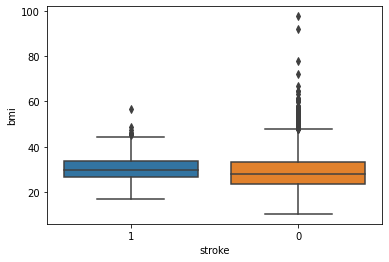

In [ ]:
sns.boxplot(data=df, x='stroke', y='bmi');

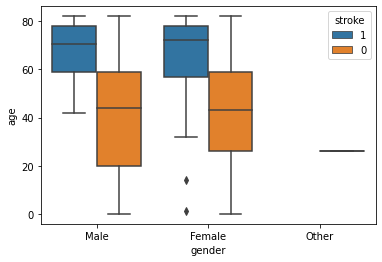

In [ ]:
# tentando algumas analises com 3 variaveis:
sns.boxplot(data=df, x='gender', y='age', hue='stroke');

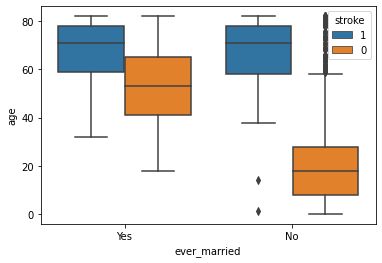

In [ ]:
# tentando algumas analises com 3 variaveis:
sns.boxplot(data=df, x='ever_married', y='age', hue='stroke');

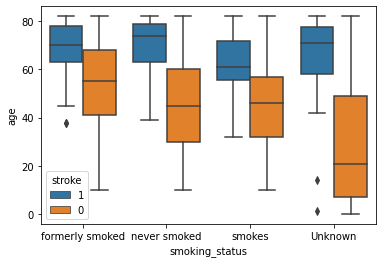

In [ ]:
# tentando algumas analises com 3 variaveis:
sns.boxplot(data=df, x='smoking_status', y='age', hue='stroke');

### **Anotações até o momento**:
* Idade e nível médio de glicose parecem ter uma relação com o fato de ter ou não derrame;
* IMC aparentemente não influencia muito;
* Eu poderia ter feito uma função pra reaproveitar o código de geração dos histogramas, mas preferi deixar assim pra ser mais rapido.

In [ ]:
# colunas categoricas:
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
# essa visualizacao nao ajudou muito:
df[['gender', 'stroke', 'id']].groupby(['gender', 'stroke']).count()

id
gender stroke      
Female 0       2853
       1        141
Male   0       2007
       1        108
Other  0          1

In [ ]:
df['gender'].value_counts(dropna=False, normalize=True)*100.0

Female    58.590998
Male      41.389432
Other      0.019569
Name: gender, dtype: float64

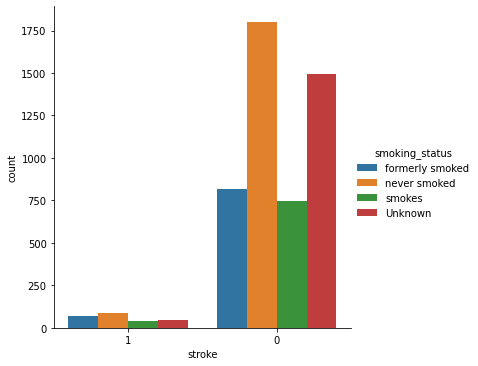

In [ ]:
# esse grafico nao ajudou muito:
sns.catplot(x="stroke", hue="smoking_status", kind="count", data=df);

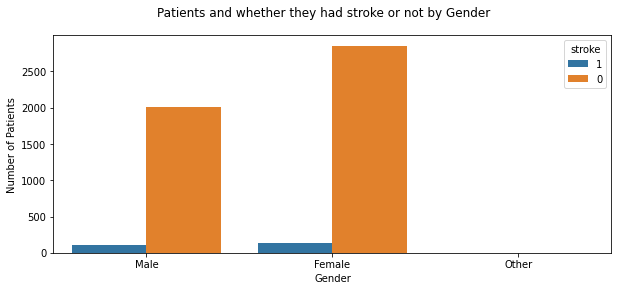

In [ ]:
# esse grafico fez mais sentido que o de cima, mas ainda fica dificil visualizar a proporcao:
fig, ax = plt.subplots(figsize=(10,4))

sns.countplot(x="gender", hue="stroke", data=df, ax=ax);

ax.set_xlabel("Gender")
ax.set_ylabel("Number of Patients")
fig.suptitle("Patients and whether they had stroke or not by Gender");

plt.show()

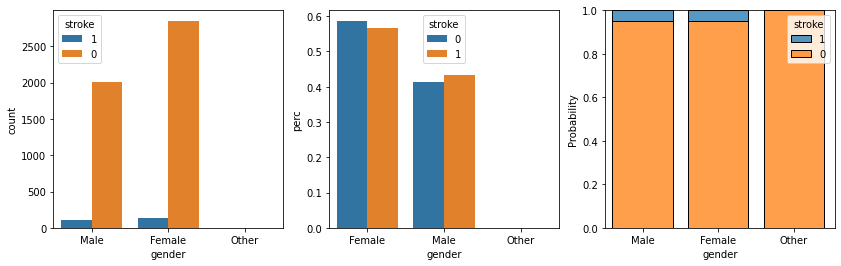

In [ ]:
# decidi colocar tres graficos pra ficar mais facil visualizar a proporcao:
fig, axes = plt.subplots(1, 3, figsize=(14,4))
sns.countplot(x='gender', hue='stroke', data=df, ax=axes[0]);

df_porc = (df['gender'].groupby(df['stroke']).value_counts(normalize=True).rename('perc').reset_index())

sns.barplot(x='gender', y='perc', hue='stroke', data=df_porc, ax=axes[1]);

sns.histplot(df, x="gender", hue="stroke", stat="probability", multiple="fill", shrink=.8, ax=axes[2]);

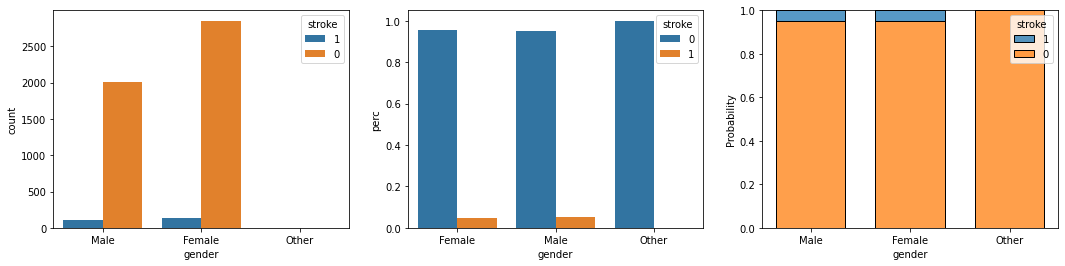

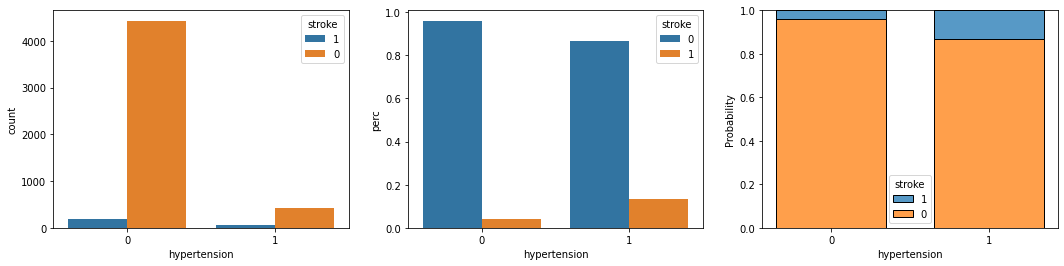

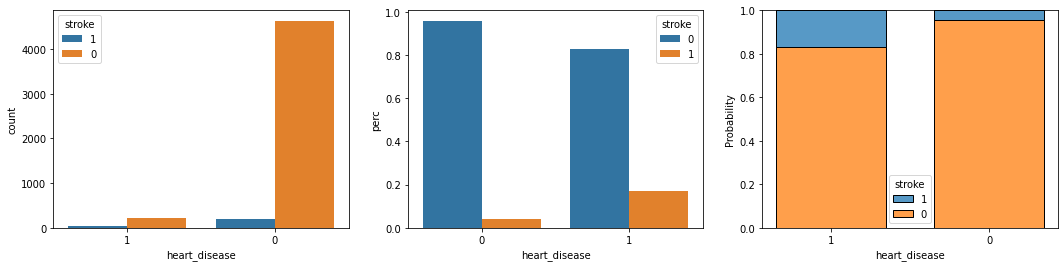

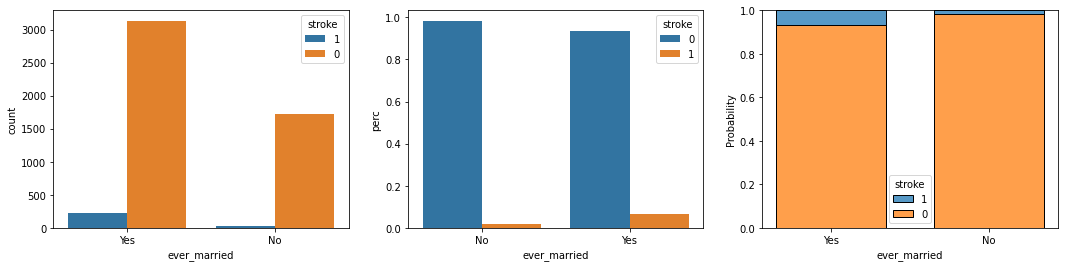

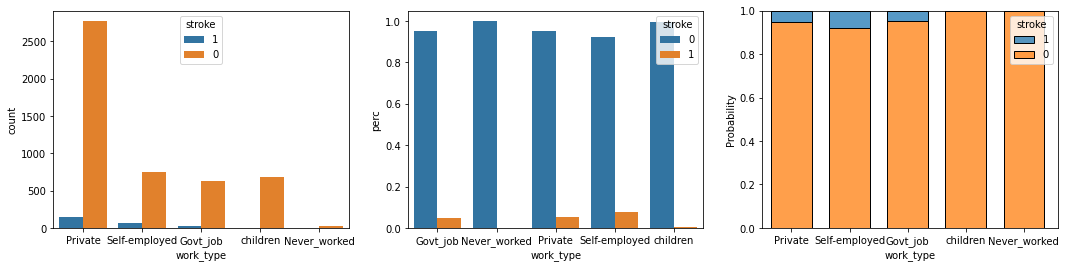

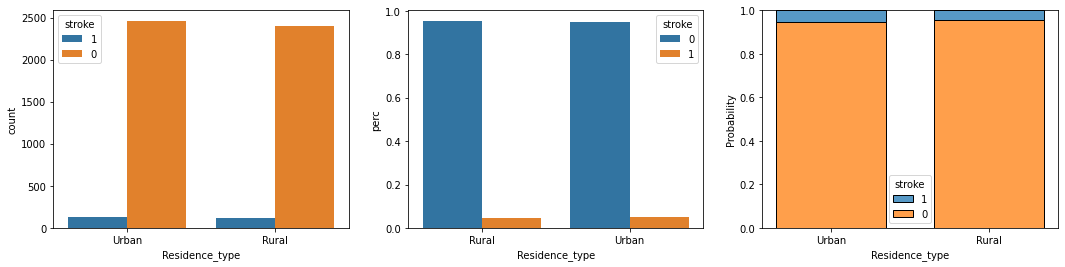

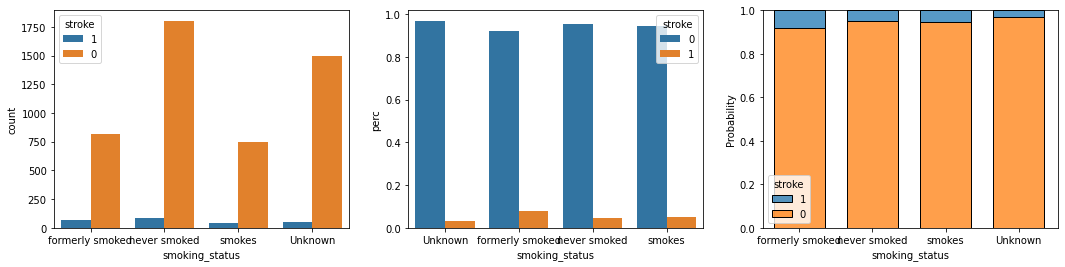

In [ ]:
# criando um for para desenhar os graficos acima para cada coluna categorica:

for coluna in cat_cols:

  fig, axes = plt.subplots(1, 3, figsize=(18,4))

  sns.countplot(x=coluna, hue="stroke", data=df, ax=axes[0]);

  df_porc = (df['stroke'].groupby(df[coluna]).value_counts(normalize=True).rename('perc').reset_index())

  sns.barplot(x=coluna, y='perc', hue='stroke', data=df_porc, ax=axes[1]);

  sns.histplot(df, x=coluna, hue="stroke", stat="probability", multiple="fill", shrink=.7, ax=axes[2]);

  plt.show()


### **Anotações até o momento**:
* Homem e mulher parecem ter a mesma probabilidade de ter derrame, proporcionalmente;
* A presença de hiper-tensão e doença do coração parece aumentar as chances de ter um derrame (como era de se esperar);
* Quem já foi casado apresenta uma proporção maior de casos de derrame comparativamente aos que não foram casados;
* O tipo de residência parece não influenciar as chances de ter derrame.

### 3. Realize as etapas de pré-processamento e separação dos dados que julgar adequadas para o treinamento de um modelo de classificação binária sobre a variável alvo, utilizando todas as demais colunas do DataFrame como variáveis do modelo.

In [ ]:
# olhando uma amostra do dataset:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3060,32604,Male,49.0,0,0,Yes,Self-employed,Rural,215.81,58.1,never smoked,0
788,7387,Female,59.0,1,0,Yes,Private,Rural,92.04,24.2,never smoked,0
535,56998,Female,12.0,0,0,No,children,Urban,138.06,23.1,Unknown,0
3651,63562,Male,7.0,0,0,No,children,Rural,91.81,15.8,Unknown,0
2271,43244,Female,40.0,0,0,Yes,Private,Rural,131.99,37.5,never smoked,0


In [ ]:
# verificando se sera necessario remover alguma amostra:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# coluna bmi possui alguns registros em branco:
# vou dar uma olhada neles:
df[df['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
df[df['bmi'].isnull()]['stroke'].value_counts(dropna=False)

0    161
1     40
Name: stroke, dtype: int64

In [ ]:
# para facilitar a analise, decidi remover essas linhas (representam menos de 4% do dataset todo)
print(df[df['bmi'].isnull()].shape[0])
print(df.shape[0])
print(df[df['bmi'].isnull()].shape[0]/df.shape[0] * 100)

201
5110
3.9334637964774952


In [ ]:
df.dropna(axis=0, subset=['bmi'], inplace=True)

In [ ]:
# agora temos 4909 amostras:
df.shape

(4909, 12)

In [ ]:
# vou remover tambem as amostras com gender == 'Other', pois apenas uma amostra possui essa classificacao:
df.query("gender == 'Other' ")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [ ]:
# pra facilitar, removendo pelo index (3116):
df.drop(3116, axis=0, inplace=True)

In [ ]:
# agora vou transformar as variaveis categoricas em variaveis dummy:
print(cat_cols)

df_dummies = pd.get_dummies(df[cat_cols])
df_dummies.head()

['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
# concatenando de volta ao dataframe original:
df = pd.concat([df, df_dummies], axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
# removendo as variaveis categoricas originais:
df.drop(axis=1, columns=cat_cols, inplace=True)

In [ ]:
# removendo a coluna id, pois nao servira pra nada pra treinar o modelo:
df.drop(axis=1, columns=['id'], inplace=True)
df.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,105.92,32.5,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,171.23,34.4,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,174.12,24.0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,81.0,186.21,29.0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
# separando X e y:
X = df.drop(columns=['stroke'], axis=1, inplace=False)
y = df['stroke']

print(X.shape)
print(y.shape)

(4908, 22)
(4908,)


In [ ]:
# verificando a proporcao de casos 0 e 1 no dataset:
counter = Counter(y)
print(counter)

Counter({'0': 4699, '1': 209})


In [ ]:
# como a variavel alvo apresenta um desbalanceamento entre 0 e 1, sera necessario aplicar alguma tecnica de oversampling:

# nao conheco muito sobre isso, entao utilizei esse artigo:
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

# usando a tecnica SMOTE (Synthetic Minority Oversampling Technique):
oversample = SMOTE(random_state=42)
X_oversample, y_oversample = oversample.fit_resample(X, y)

In [ ]:
# verificando novamente a proporcao de casos 0 e 1 no dataset, apos o oversampling:
counter = Counter(y_oversample)
print(counter)

Counter({'1': 4699, '0': 4699})


In [ ]:
print(X_oversample.shape)
print(y_oversample.shape)

(9398, 22)
(9398,)


In [ ]:
X_oversample = pd.DataFrame(X_oversample, columns=X.columns)
X_oversample.head()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,80.0,105.92,32.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,49.0,171.23,34.4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,79.0,174.12,24.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,81.0,186.21,29.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# finalmente, vou separar o dataset em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, train_size=0.7, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6578, 22)
(2820, 22)
(6578,)
(2820,)


In [ ]:
# https://datascience.stackexchange.com/questions/39932/feature-scaling-both-training-and-test-data
# agora vou deixar todas as colunas na mesma escala (usando apenas o dataset de treino para calcular a escala):
scaler = StandardScaler()
X_train_transform = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_transform, columns=X_train.columns)
X_train_scaled.head()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-2.011219,-1.039907,-1.501968,0.929540,-0.929540,0.530557,-0.530557,0.417982,-0.417982,1.900477,-1.900477,-0.432689,-0.052382,-1.304175,-0.541768,3.525411,-1.068686,1.068686,1.938432,-0.590368,-0.851475,-0.487219
1,-1.205723,-0.545079,0.474757,0.929540,-0.929540,0.530557,-0.530557,0.417982,-0.417982,1.900477,-1.900477,-0.432689,-0.052382,0.897715,-0.541768,-0.285362,1.111542,-1.111542,-0.580258,2.086282,-0.851475,-0.487219
2,-0.265978,-0.213952,-0.644418,0.929540,-0.929540,-2.398998,2.398998,0.417982,-0.417982,-0.574230,0.574230,2.776086,-0.052382,-1.304175,-0.541768,-0.285362,1.111542,-1.111542,1.938432,-0.590368,-0.851475,-0.487219
3,1.006644,0.096478,0.005285,0.451013,-0.451013,-1.756494,1.756494,-0.354190,0.354190,-0.574230,0.574230,-0.432689,-0.052382,-0.821261,1.624564,-0.285362,-0.590523,0.590523,-0.580258,-0.003331,0.876364,-0.487219
4,-0.265978,-0.491517,0.532896,-1.252346,1.252346,-2.398998,2.398998,0.417982,-0.417982,-0.574230,0.574230,-0.432689,-0.052382,-1.304175,2.233154,-0.285362,1.111542,-1.111542,-0.580258,2.086282,-0.851475,-0.487219


In [ ]:
# transformando o dataset de teste (cuidado para nao ter data leakage - usei apenas o dataset de treino para fazer o scaler):
X_test_transform = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_transform, columns=X_test.columns)
X_test_scaled.head()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.271019,-0.918772,2.088113,-1.252346,1.252346,0.530557,-0.530557,0.417982,-0.417982,-0.574230,0.574230,-0.432689,-0.052382,0.897715,-0.541768,-0.285362,-1.068686,1.068686,-0.580258,2.086282,-0.851475,-0.487219
1,-1.295223,-0.058409,-1.560107,0.929540,-0.929540,0.530557,-0.530557,0.417982,-0.417982,1.900477,-1.900477,-0.432689,-0.052382,0.897715,-0.541768,-0.285362,-1.068686,1.068686,-0.580258,2.086282,-0.851475,-0.487219
2,-0.444977,-0.211823,1.143355,0.929540,-0.929540,0.530557,-0.530557,0.417982,-0.417982,-0.574230,0.574230,-0.432689,-0.052382,0.897715,-0.541768,-0.285362,-1.068686,1.068686,-0.580258,-0.590368,1.361768,-0.487219
3,1.141642,-0.757171,-0.971967,0.929540,-0.929540,-1.064969,1.064969,0.417982,-0.417982,-0.574230,0.574230,-0.432689,-0.052382,0.897715,-0.541768,-0.285362,1.111542,-1.111542,-0.580258,-0.590368,1.361768,-0.487219
4,-1.563721,-0.035352,0.213132,-1.252346,1.252346,0.530557,-0.530557,0.417982,-0.417982,1.900477,-1.900477,-0.432689,-0.052382,0.897715,-0.541768,-0.285362,1.111542,-1.111542,-0.580258,-0.590368,-0.851475,2.477516


In [ ]:
# renomeando de volta os datasets de treino e teste pra nao precisar usar os nomes longos dos datasets:
X_train = X_train_scaled
X_test = X_test_scaled

### 4. Apresente um gráfico 2D de dispersão dos dados de teste em relação à variável alvo. Neste procedimento as colunas de variáveis devem ser transformadas apenas em duas, formando os eixos X e Y do gráfico. Para amostras com valor de "TARGET" 0 utilizar a cor azul; já para amostras de "TARGET" 1 utilizar vermelho.

In [ ]:
# primeiro, preciso aplicar alguma tecnica de reducao de dimensionalidade no X para que seja reduzido para apenas 2 dimensoes:

# nao conheco muito sobre essas tecnicas, entao usei ideias desse artigo:
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

# verificando como fica usando o PCA:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_test.values)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.187017   0.11627489]


In [ ]:
pca_first = pca_result[:,0]
pca_second = pca_result[:,1]

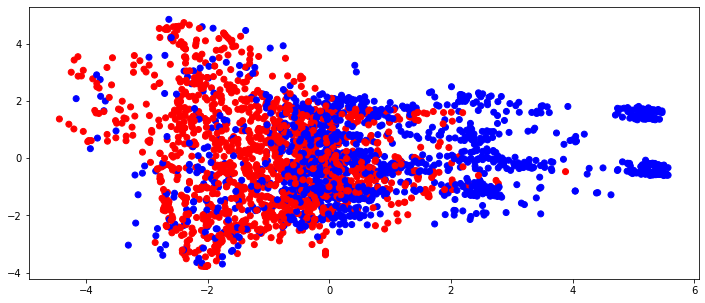

In [ ]:
colors=['red' if y=='1' else 'blue' for y in y_test]

plt.figure(figsize=(12,5))
plt.scatter(pca_first, pca_second, color=colors);
plt.show()

In [ ]:
# verificando agora como fica usando t-SNE:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

tsne_result = tsne.fit_transform(X_test.values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2820 samples in 0.020s...
[t-SNE] Computed neighbors for 2820 samples in 0.456s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2820
[t-SNE] Computed conditional probabilities for sample 2000 / 2820
[t-SNE] Computed conditional probabilities for sample 2820 / 2820
[t-SNE] Mean sigma: 1.418125
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.459518
[t-SNE] KL divergence after 300 iterations: 1.111491


In [ ]:
tsne_first = tsne_result[:,0]
tsne_second = tsne_result[:,1]

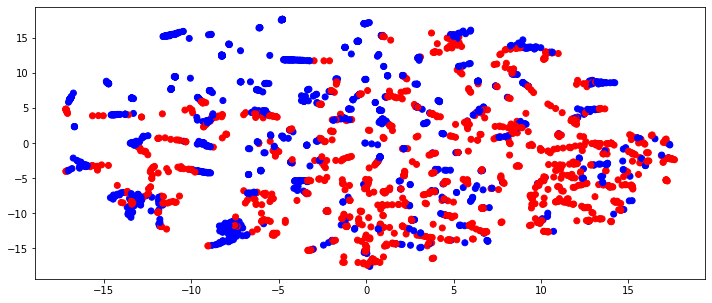

In [ ]:
colors=['red' if y=='1' else 'blue' for y in y_test]

plt.figure(figsize=(12,5))
plt.scatter(tsne_first, tsne_second, color=colors)
plt.show()

### 5. A partir dos dados da etapa 3, treine um modelo de classificação binária baseado em árvore. Utilize uma técnica de otimização de hiper-parametros a sua escolha.

In [ ]:
# comecando com uma simples arvore de decisao, pois possui facil interpretabilidade:
model_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
cross_val_score(model_tree, X_train, y_train, cv=5)

array([0.94604863, 0.94300912, 0.94908815, 0.95057034, 0.95893536])

In [ ]:
# avaliando o modelo default, sem mudar nenhum parametro:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_predict_train = model_tree.predict(X_train)
y_predict_test = model_tree.predict(X_test)

In [ ]:
acc_train = accuracy_score(y_train, y_predict_train)
acc_test = accuracy_score(y_test, y_predict_test)

print(acc_train)
print(acc_test)

1.0
0.95


In [ ]:
confusion_matrix(y_test, y_predict_test)

array([[1330,   77],
       [  64, 1349]])

In [ ]:
confusion_matrix(y_test, y_predict_test, normalize='all')

array([[0.47163121, 0.02730496],
       [0.02269504, 0.47836879]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_test).ravel()
print(tn, fp, fn, tp)

1330 77 64 1349


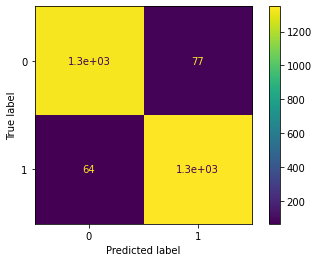

In [ ]:
plot_confusion_matrix(model_tree, X_test, y_test)
plt.show()

In [ ]:
target_names = ['no-stroke', 'stroke']
print(classification_report(y_test, y_predict_test, target_names=target_names))

              precision    recall  f1-score   support

   no-stroke       0.95      0.95      0.95      1407
      stroke       0.95      0.95      0.95      1413

    accuracy                           0.95      2820
   macro avg       0.95      0.95      0.95      2820
weighted avg       0.95      0.95      0.95      2820



In [ ]:
model_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# utilizando uma tecnica de otimizacao de hiper-parametros:
param_grid = {
    'max_depth': [5, 7, 10],
    'min_samples_leaf': [100, 300, 500],
    'min_samples_split': [100, 300, 500]
}

model_tree_grid_search = GridSearchCV(model_tree, param_grid, cv=5)
model_tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 7, 10],
                         'min_

In [ ]:
model_tree_grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
model_tree_grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}

In [ ]:
sorted(model_tree_grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
print(model_tree_grid_search.cv_results_['mean_test_score'])
print('========')
print(np.mean(model_tree_grid_search.cv_results_['mean_test_score']))

[0.840527   0.83505646 0.82517457 0.82259145 0.82259145 0.82259145
 0.80982144 0.80982144 0.80982144 0.86363424 0.8580116  0.84812972
 0.82411236 0.82411236 0.82411236 0.80982144 0.80982144 0.80982144
 0.87382008 0.86622106 0.84812972 0.82411236 0.82411236 0.82411236
 0.80982144 0.80982144 0.80982144]
0.8281313304474861


In [ ]:
model_tree_grid_search.cv_results_['params']

[{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100},
 {'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 300},
 {'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 500},
 {'max_depth': 5, 'min_samples_leaf': 300, 'min_samples_split': 100},
 {'max_depth': 5, 'min_samples_leaf': 300, 'min_samples_split': 300},
 {'max_depth': 5, 'min_samples_leaf': 300, 'min_samples_split': 500},
 {'max_depth': 5, 'min_samples_leaf': 500, 'min_samples_split': 100},
 {'max_depth': 5, 'min_samples_leaf': 500, 'min_samples_split': 300},
 {'max_depth': 5, 'min_samples_leaf': 500, 'min_samples_split': 500},
 {'max_depth': 7, 'min_samples_leaf': 100, 'min_samples_split': 100},
 {'max_depth': 7, 'min_samples_leaf': 100, 'min_samples_split': 300},
 {'max_depth': 7, 'min_samples_leaf': 100, 'min_samples_split': 500},
 {'max_depth': 7, 'min_samples_leaf': 300, 'min_samples_split': 100},
 {'max_depth': 7, 'min_samples_leaf': 300, 'min_samples_split': 300},
 {'max_depth': 7, 'm

In [ ]:
# usando a melhor combinacao de hiper-parametros, segundo o GridSearchCV:
y_pred_train = model_tree_grid_search.predict(X_train)
y_pred_test = model_tree_grid_search.predict(X_test)

In [ ]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(acc_train)
print(acc_test)

0.8993615080571602
0.8914893617021277


In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[1348,   59],
       [ 247, 1166]])

In [ ]:
# comparando a tabela com as metricas que o classification_report apresenta:
target_names = ['no-stroke', 'stroke']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

   no-stroke       0.85      0.96      0.90      1407
      stroke       0.95      0.83      0.88      1413

    accuracy                           0.89      2820
   macro avg       0.90      0.89      0.89      2820
weighted avg       0.90      0.89      0.89      2820



In [ ]:
# tentando outro tipo de cross-validation:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

scores = cross_val_score(model_tree_grid_search.best_estimator_, X_train, y_train, scoring='roc_auc', cv=cv)

print(scores)
print('=======')
print('Mean ROC AUC: %.3f' % np.mean(scores))

[0.95680231 0.94311061 0.96210078 0.94406393 0.94590869 0.94242695
 0.95295672 0.95974261 0.95307953 0.96166489 0.94004222 0.9487
 0.96004749 0.94992667 0.94459364]
Mean ROC AUC: 0.951


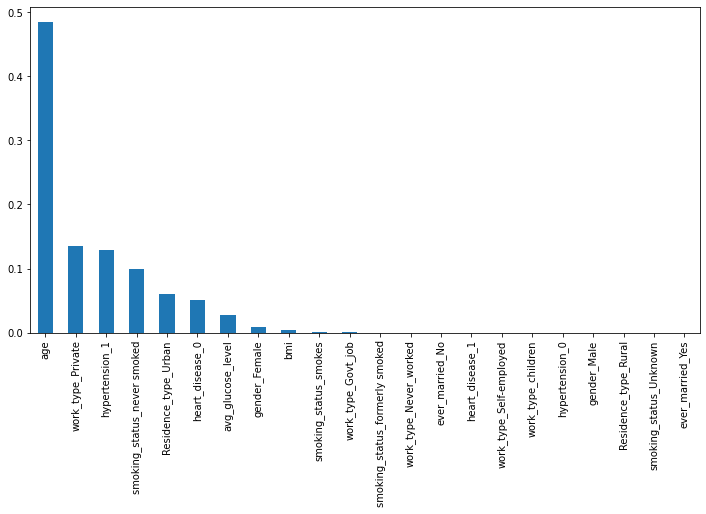

In [ ]:
feature_importances = model_tree_grid_search.best_estimator_.feature_importances_

model_tree_importances = pd.Series(feature_importances, index=X_train.columns)

plt.figure(figsize=(12,6))
model_tree_importances.sort_values(ascending=False).plot.bar()
plt.show()

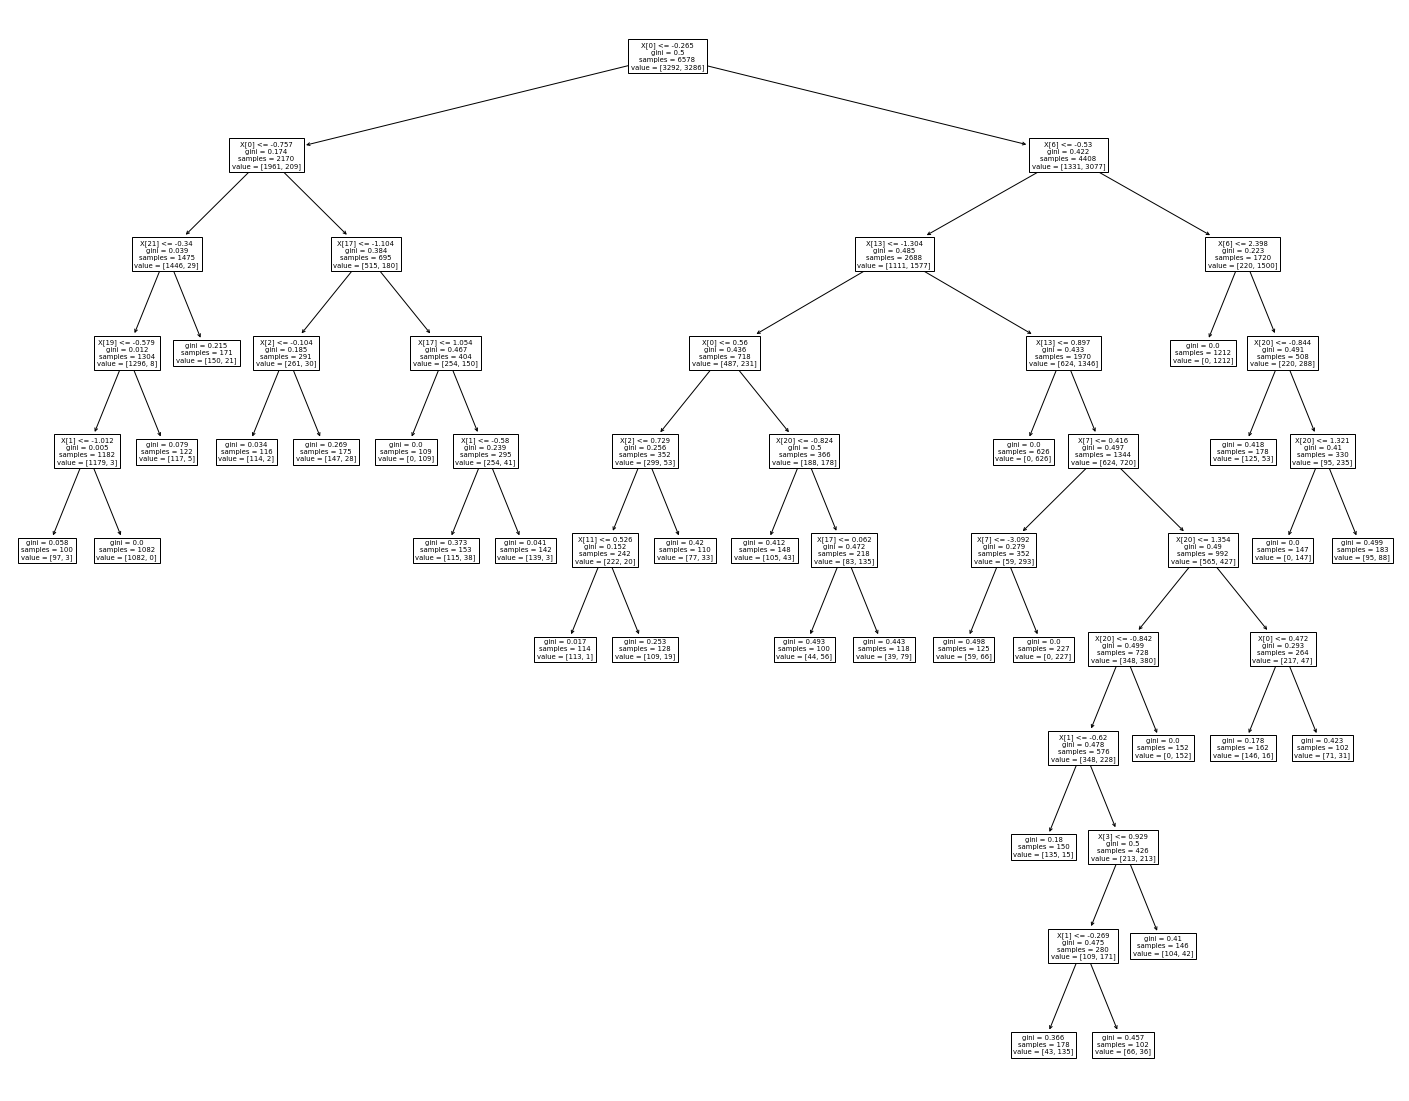

In [ ]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
# dando uma olhada na arvore treinada, apos escolher os melhores hiper-parametros:
plt.figure(figsize=(25,20))
tree.plot_tree(model_tree_grid_search.best_estimator_);
plt.show()

### **Anotações até o momento**:
* A árvore de decisão treinada acima apresenta um bom resultado, tanto no treino como no teste, ou seja, não há underfit nem overfit;
* Idade parece ser a variável que mais influencia o modelo;
* Inesperadamente, o tipo de trabalho *Private* é o segundo maior fator de influência no modelo.

### 6. A partir dos dados da etapa 3, treine um modelo de classificação binária baseado em redes neurais. Utilize uma técnica de otimização de hiper-parametros ou busca automática de rede a sua escolha.

In [ ]:
# usando o modelo presente na biblioteca sklearn mesmo, pois esse dataset nao possui um tamanho grande
# a ponto de precisar de coisas mais avancadas, como TensorFlow, Keras ou PyTorch:

# usando as mesmas tecnicas de cross validation, otimizacao de hiper-parametro e confusion matrix usadas acima:
model_neural_network = MLPClassifier(random_state=42)

In [ ]:
cross_val_score(model_tree, X_train, y_train, cv=5)

array([0.94604863, 0.94300912, 0.94908815, 0.95057034, 0.95893536])

In [ ]:
# avaliando o modelo default, sem mudar nenhum parametro:
model_neural_network.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_predict_train = model_neural_network.predict(X_train)
y_predict_test = model_neural_network.predict(X_test)

In [ ]:
acc_train = accuracy_score(y_train, y_predict_train)
acc_test = accuracy_score(y_test, y_predict_test)

print(acc_train)
print(acc_test)

0.9809972636059593
0.9609929078014184


In [ ]:
target_names = ['no-stroke', 'stroke']
print(classification_report(y_test, y_predict_test, target_names=target_names))

              precision    recall  f1-score   support

   no-stroke       0.95      0.97      0.96      1407
      stroke       0.97      0.95      0.96      1413

    accuracy                           0.96      2820
   macro avg       0.96      0.96      0.96      2820
weighted avg       0.96      0.96      0.96      2820



In [ ]:
# tentando outro tipo de cross-validation:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

scores = cross_val_score(model_neural_network, X_train, y_train, scoring='roc_auc', cv=cv)

print(scores)
print('=======')
print('Mean ROC AUC: %.3f' % np.mean(scores))

[0.9927361  0.98995757 0.99311721 0.98759906 0.9879044  0.98830385
 0.98833388 0.991609   0.99466582 0.9931183  0.99187228 0.99225569
 0.99137342 0.990819   0.98835316]
Mean ROC AUC: 0.991


In [ ]:
model_neural_network.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
# utilizando uma tecnica de otimizacao de hiper-parametros:

# vou testar com poucas combinacoes de hiper-parametros, pois pode levar bastante tempo para treinar todas as combinacoes:
# testei apenas com uma hidden layer pelo mesmo motivo, tempo
# provavelmente com mais hidden layers, a rede poderia aprender mais padroes entre as variaveis de entrada
param_grid = {
    #'activation': ['logistic', 'tanh', 'relu'],
    #'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'hidden_layer_sizes': [(5,), (10,), (20,)],
    'max_iter': [100, 200, 300],
    #'momentum': [0.9, 0.99, 0.999],
    #'solver': ['sgd', 'adam']
}

model_neural_network_grid_search  = GridSearchCV(model_neural_network, param_grid, cv=5)
model_neural_network_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=42, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [ ]:
print(model_neural_network_grid_search.best_estimator_)
print('=======')
print(model_neural_network_grid_search.best_params_)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
{'hidden_layer_sizes': (20,), 'max_iter': 300}


In [ ]:
print(model_neural_network_grid_search.cv_results_['mean_test_score'])
print('========')
print(np.mean(model_neural_network_grid_search.cv_results_['mean_test_score']))

[0.82623667 0.83840096 0.8417472  0.8394641  0.85922706 0.86804396
 0.87427531 0.89662371 0.90437736]
0.8609329265238981


In [ ]:
# usando a melhor combinacao de hiper-parametros, segundo o GridSearchCV:
y_pred_train = model_neural_network_grid_search.predict(X_train)
y_pred_test = model_neural_network_grid_search.predict(X_test)

In [ ]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(acc_train)
print(acc_test)

0.9267254484645789
0.9134751773049645


In [ ]:
# comparando a tabela com as metricas que o classification_report apresenta:
target_names = ['no-stroke', 'stroke']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

   no-stroke       0.91      0.91      0.91      1407
      stroke       0.91      0.91      0.91      1413

    accuracy                           0.91      2820
   macro avg       0.91      0.91      0.91      2820
weighted avg       0.91      0.91      0.91      2820



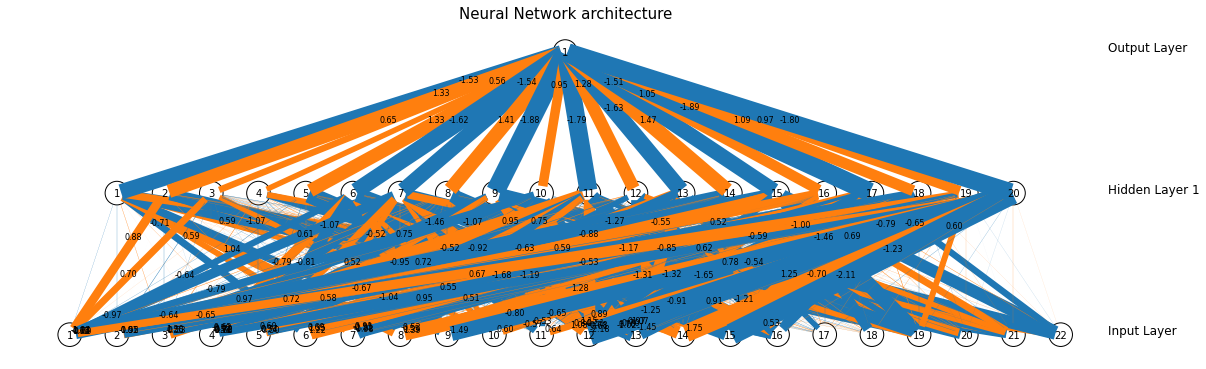

In [ ]:
# dando uma olhada na rede neural treinada, apos escolher os melhores hiper-parametros:
# utilizando uma biblioteca que encontrei e fiz uma copia de seu codigo todo na primeira celular desse notebook:
# http://www.jzliu.net/blog/simple-python-library-visualize-neural-network/

# colocando hardcode os tamanhos da rede neural:
# 22 inputs
# 20 nodes na hidden layer
# 1 output (binario)
network_structure = [22, 20, 1] #model_neural_network_grid_search.best_estimator_.
classifier_weights = model_neural_network_grid_search.best_estimator_.coefs_


network = DrawNN(network_structure, classifier_weights);
network.draw()

plt.show();

### 7. A partir dos dados da etapa 3, treine um modelo utilizando qualquer técnica a sua escolha, desde que seja diferente das utilizadas nas questões 5 e 6.

In [ ]:
# vou usar uma regressao logistica:

# usando as mesmas tecnicas de cross validation, otimizacao de hiper-parametro e confusion matrix usadas acima:
model_logistic = LogisticRegression(random_state=42)

In [ ]:
cross_val_score(model_logistic, X_train, y_train, cv=5)

array([0.78647416, 0.78647416, 0.79635258, 0.77262357, 0.77110266])

In [ ]:
# avaliando o modelo default, sem mudar nenhum parametro:
model_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict_train = model_logistic.predict(X_train)
y_predict_test = model_logistic.predict(X_test)

In [ ]:
acc_train = accuracy_score(y_train, y_predict_train)
acc_test = accuracy_score(y_test, y_predict_test)

print(acc_train)
print(acc_test)

0.7816965643052599
0.7872340425531915


In [ ]:
target_names = ['no-stroke', 'stroke']
print(classification_report(y_test, y_predict_test, target_names=target_names))

              precision    recall  f1-score   support

   no-stroke       0.80      0.77      0.78      1407
      stroke       0.78      0.80      0.79      1413

    accuracy                           0.79      2820
   macro avg       0.79      0.79      0.79      2820
weighted avg       0.79      0.79      0.79      2820



In [ ]:
# tentando outro tipo de cross-validation:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

scores = cross_val_score(model_logistic, X_train, y_train, scoring='roc_auc', cv=cv)

print(scores)
print('=======')
print('Mean ROC AUC: %.3f' % np.mean(scores))

[0.86773466 0.85522088 0.86134413 0.85481811 0.85264836 0.8448066
 0.84480198 0.8752044  0.86587278 0.86336299 0.85395288 0.87126383
 0.86872812 0.84668036 0.85306704]
Mean ROC AUC: 0.859


In [ ]:
model_logistic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# utilizando uma tecnica de otimizacao de hiper-parametros:

param_grid = {
    'C': [0.2, 0.5, 1],
    'max_iter': [300, 500, 1000]
    #'penalty': ['l1', 'l2', 'elasticnet'],
    #'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

model_logistic_grid_search  = GridSearchCV(model_logistic, param_grid, cv=5, verbose=True)
model_logistic_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.2, 0.5, 1], 'max_iter': [300, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [ ]:
print(model_logistic_grid_search.best_estimator_)
print('=======')
print(model_logistic_grid_search.best_params_)

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 0.2, 'max_iter': 300}


In [ ]:
print(model_logistic_grid_search.cv_results_['mean_test_score'])
print('========')
print(np.mean(model_logistic_grid_search.cv_results_['mean_test_score']))

[0.78306159 0.78306159 0.78306159 0.78245345 0.78245345 0.78245345
 0.78260543 0.78260543 0.78260543]
0.782706823688945


In [ ]:
# usando a melhor combinacao de hiper-parametros, segundo o GridSearchCV:
y_pred_train = model_logistic_grid_search.predict(X_train)
y_pred_test = model_logistic_grid_search.predict(X_test)

In [ ]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(acc_train)
print(acc_test)

0.7815445424141076
0.7872340425531915


In [ ]:
# comparando a tabela com as metricas que o classification_report apresenta:
target_names = ['no-stroke', 'stroke']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

   no-stroke       0.80      0.77      0.78      1407
      stroke       0.78      0.80      0.79      1413

    accuracy                           0.79      2820
   macro avg       0.79      0.79      0.79      2820
weighted avg       0.79      0.79      0.79      2820



### 8. Compare os resultados dos três modelos acima e justifique a métrica escolhida para avaliação.

In [ ]:
# funcao para imprimir a tabela com as metricas:
def tabela_metricas(y_test, y_pred_test, nome):
  target_names = ['no-stroke', 'stroke']

  print('Modelo: {}'.format(nome))
  print(classification_report(y_test, y_pred_test, target_names=target_names))
  print()
  print('===================')
  print()

In [ ]:
# metrica escolhida: F1-score
# motivo: metrica que considera importante tanto o precision como o recall:

nome = 'Árvore de Decisão'
y_pred_test = model_tree_grid_search.predict(X_test)
tabela_metricas(y_test, y_pred_test, nome)

nome = 'Rede Neural'
y_pred_test = model_neural_network_grid_search.predict(X_test)
tabela_metricas(y_test, y_pred_test, nome)

nome = 'Regressão Logística'
y_pred_test = model_logistic_grid_search.predict(X_test)
tabela_metricas(y_test, y_pred_test, nome)

Modelo: Árvore de Decisão
              precision    recall  f1-score   support

   no-stroke       0.85      0.96      0.90      1407
      stroke       0.95      0.83      0.88      1413

    accuracy                           0.89      2820
   macro avg       0.90      0.89      0.89      2820
weighted avg       0.90      0.89      0.89      2820



Modelo: Rede Neural
              precision    recall  f1-score   support

   no-stroke       0.91      0.91      0.91      1407
      stroke       0.91      0.91      0.91      1413

    accuracy                           0.91      2820
   macro avg       0.91      0.91      0.91      2820
weighted avg       0.91      0.91      0.91      2820



Modelo: Regressão Logística
              precision    recall  f1-score   support

   no-stroke       0.80      0.77      0.78      1407
      stroke       0.78      0.80      0.79      1413

    accuracy                           0.79      2820
   macro avg       0.79      0.79      0.79      2

In [ ]:
##################################################################################
# O codigo dessa celula nao funcionou e nao consegui achar o problema a tempo,
# entao nao usei, mas deixo aqui para fins meramente ilustrativos.
##################################################################################

# metrica escolhida: F1-score
# motivo: metrica que considera importante tanto o precision como o recall:

#metrica_tree = f1_score(y_test, model_tree_grid_search.best_estimator_.predict(X_test))

#metrica_neural_network = f1_score(y_test, model_neural_network_grid_search.best_estimator_.predict(X_test))

#metrica_logistic = f1_score(y_test, model_logistic_grid_search.best_estimator_.predict(X_test))

#print('Comparação entre as métricas F1 score:')
#print()
#print('Árvore de decisão: {}'.format(metrica_tree))
#print('Rede Neural: {}'.format(metrica_tree))
#print('Regressão logística: {}'.format(metrica_tree))

### Resposta:
* Escolhi a métrica F1 score, pois considera importante tanto o precision como o recall. E isso é importante em distribuições desbalanceadas como esse caso.
* Caso fosse usado a acurácia, por exemplo, poderia dar um valor muito alto, mas acertando muito a classificação majoritária e tendo uma performance péssima na classificação minoritaria (que é a mais importante nesse caso).
* Comparando o F1 score de cada modelo, o que apresentou melhor performance no dataset de teste foi a rede neural, mas com uma pequena diferença para a árvore de decisão;
* Como a árvore de decisão é um modelo muito mais simples e mais fácil de interpretar, minha escolha seria ela (mais detalhes no próximo item).

### 9. Escolha um dos três modelos acima. Supondo que um falso negativo tenha um custo muito maior do que falso positivo, e sabendo que a predição da variável alvo é realizada entre 0 e 1, mesmo em modelos de classificação binária, selecione um limiar para definir se uma pessoa terá ou não um derrame e justique a sua escolha.

#### **Resposta:** Escolho a árvore de decisão mesmo, pois é a mais simples e fácil de interpretar, mesmo que não tenha sido a que teve maior performance no dataset de test (rede neural foi um pouco melhor, mas é mais complexa e de difícil interpretabilidade).

In [ ]:
# verificando com limiar (threshold) sera a melhor opcao, considerando a classe minoritaria como mais importante:
ordem_classes = model_tree_grid_search.best_estimator_.classes_
print(ordem_classes)

nome_classes = ['no-stroke', 'stroke']
print(nome_classes)

['0' '1']
['no-stroke', 'stroke']


In [ ]:
# criando um dataframe com os valores de probabilidade
array_probabilidades = model_tree_grid_search.predict_proba(X_test)

df_probabilidades = pd.DataFrame(array_probabilidades, columns=nome_classes)
df_probabilidades.head()

,no-stroke,stroke
0,0.900000,0.100000
1,0.959016,0.040984
2,0.978873,0.021127
3,0.000000,1.000000
4,0.877193,0.122807


In [ ]:
# selecionando apenas a probabilidade da classe 1, ou seja, stroke (chance de ter derrame):
y_pred_test_proba = df_probabilidades['stroke'].values
y_pred_test_proba

array([0.1       , 0.04098361, 0.02112676, ..., 0.        , 1.        ,
       1.        ])

In [ ]:
##################################################################################
# O codigo dessa celula nao funcionou e nao consegui achar o problema a tempo,
# entao nao usei, mas deixo aqui para fins meramente ilustrativos.
##################################################################################

# funcao para calcular a performance conforme varias opcoes de threshold:
#def classificacao_threshold(threshold=0.5, y_pred_test_proba=y_pred_test_proba):

#  y_pred = (y_pred_test_proba >= threshold).astype(int)

#  f1_score(y_test, y_pred)

#  return f1_score

In [ ]:
# me baseei nesse artigo pra verificar qual o melhor threshold:
# https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
  return (pos_probs >= threshold).astype('int')

# define thresholds
thresholds = np.arange(0, 1, 0.001)

# evaluate each threshold
scores = [f1_score(y_test.astype(int), to_labels(y_pred_test_proba, t)) for t in thresholds]

# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F1-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.301, F1-Score=0.89774


#### Resposta: considerando o melhor F1 score, o melhor threshold seria de **0,301**

In [ ]:
# verificando como ficaria a confusion matrix usando esse threshold:
# considerando que quero ter o minimo de erros de casos de derrame (baixo falso negativo), mas equilibrado com os falsos positivos

best_threshold = 0.301
y_pred_best_threshold = to_labels(y_pred_test_proba, best_threshold)

confusion_matrix(y_test.astype(int), y_pred_best_threshold)

array([[1257,  150],
       [ 140, 1273]])

In [ ]:
# valores de true e false positive e negative:
tn, fp, fn, tp = confusion_matrix(y_test.astype(int), y_pred_best_threshold).ravel()

print(tn, fp, fn, tp)

print('False Negative: {}'.format(fn))

1257 150 140 1273
False Negative: 140


In [ ]:
fn/(tn+fn)*100

10.021474588403724

In [ ]:
target_names = ['no-stroke', 'stroke']
print(classification_report(y_test.astype(int), y_pred_best_threshold, target_names=target_names))

              precision    recall  f1-score   support

   no-stroke       0.90      0.89      0.90      1407
      stroke       0.89      0.90      0.90      1413

    accuracy                           0.90      2820
   macro avg       0.90      0.90      0.90      2820
weighted avg       0.90      0.90      0.90      2820



In [ ]:
# com esse threshold, esse modelo erra apenas 140 casos, que tem chance alta de ter derrame, mas o modelo diz que nao terá derrame:
# ou seja, uma taxa de falsos negativos de aproximadamente 10%

Best Threshold=0.352941, G-Mean=0.898


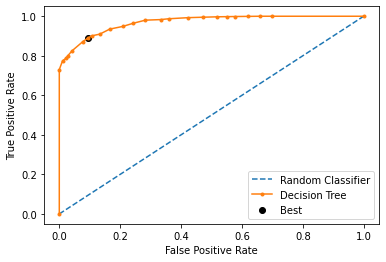

In [ ]:
# me baseei nesse artigo pra plotar o grafico abaixo:
# https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred_test_proba)

# calculate the g-mean for each threshold (media geometrica)
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='Random Classifier')
plt.plot(fpr, tpr, marker='.', label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# show the plot
plt.show()

#### **Observação**: não consegui continuar o estudo do gráfico acima, porque não deu tempo. Mas vou manter no notebook para fins meramente ilustrativos.

### 10. Realize uma análise de "Equal Error Rate" e uma análise "SHAP" para o modelo a cima e descreva suas conclusões.

#### **Resposta Equal Error Rate:** tentei estudar sobre "Equal Error Rate", mas não deu tempo. Eu ainda não conhecia esse conceito.
#### Alguns artigos que comecei a ler pra entender sobre isso:
* https://medium.com/@mustafaazzurri/face-recognition-system-and-calculating-frr-far-and-eer-for-biometric-system-evaluation-code-2ac2bd4fd2e5
* https://www.programmersought.com/article/98977215291/


#### **Resposta final**: Vou ficar devendo essa análise dessa vez... :(

#### **Análise SHAP:**

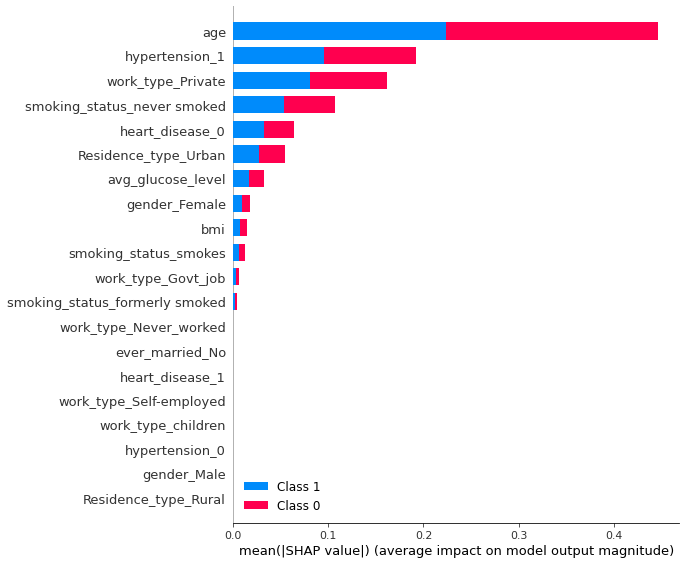

In [ ]:
# Me baseei nesse artigo para plotar os graficos:
# https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

# Primeiro: Interpretabilidade Global:
# grafico de importancia das variaveis:
shap_values = shap.TreeExplainer(model_tree_grid_search.best_estimator_).shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")

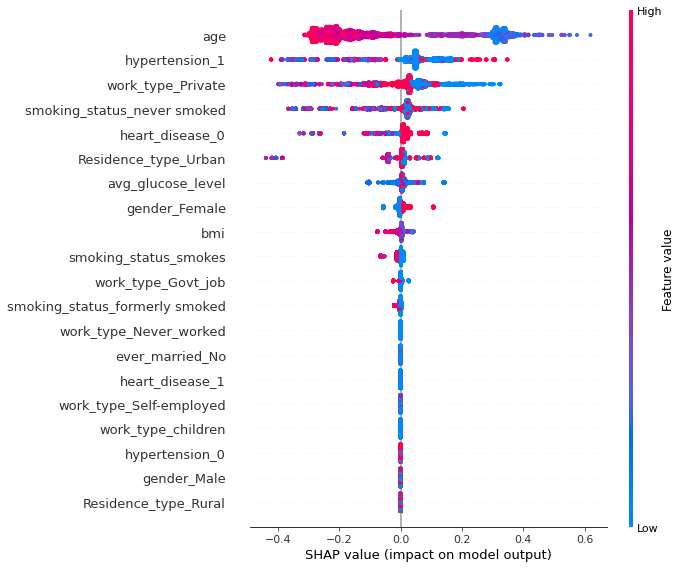

In [ ]:
shap.summary_plot(shap_values[0], X_train)

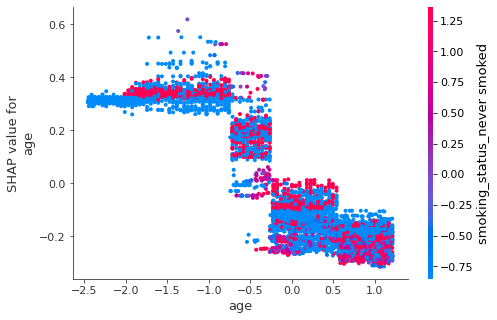

In [ ]:
# Dependence Plot:
shap.dependence_plot('age', shap_values[0], X_train)

### Anotações sobre a análise SHAP:
* A idade é a que mais contribui no modelo e, portanto, tem o maior poder preditivo, tanto para casos positivos como negativos;
* Analisando o gráfico de dependência, é possível ver que a idade possui uma interação forte **negativa** dentro do modelo entre o fato do paciente nunca ter fumado e as chances de ter ou não derrame.

### 11. Crie uma classe que carregue o modelo treinado do disco e tenha uma função de predição. A função de predição deve receber como parâmetro uma única amostra de dados e retorne o resultado de predição (0 ou 1) utilizando o limiar definido na questão 9.

In [ ]:
# salvando o modelo escolhido no disco para depois usar na funcao:
import pickle
filename = 'modelo_escolhido.sav'
pickle.dump(model_tree_grid_search.best_estimator_, open(filename, 'wb'))

In [ ]:
# testando a leitura do modelo que acabou de ser salvo em disco:
filename = 'modelo_escolhido.sav'
modelo = pickle.load(open(filename, 'rb'))

print(modelo)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [ ]:
def predicao_derrame(X):

  # upload do modelo do disco:
  filename = 'modelo_escolhido.sav'
  modelo = pickle.load(open(filename, 'rb'))

  # transformando a amostra, conforme a mesma escala usada no modelo treinado:
  X_scaled = scaler.transform(X) # assumindo que "scaler" ja esta com a escala gerada pelo dataset de treino

  pos_prob = modelo.predict_proba(X_scaled)[:, 1]

  # limiar definido na questao 9:
  threshold = 0.301
  predicao = (pos_prob >= threshold).astype('int')

  return predicao[0]

In [ ]:
# selecionando uma amostra aleatoria do dataset de teste pra testar a chamado da funcao de predicao:
random_value = np.random.randint(0, X_test.shape[0], 1)
print(random_value)
X_amostra = X_test.query("index == {}".format(random_value))
X_amostra

[397]


,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
397,0.357834,1.512965,1.841606,0.896815,-0.896815,0.530557,-0.530557,0.417982,-0.417982,-0.57423,0.57423,2.727959,-0.052382,-1.27115,-0.541768,-0.285362,1.078842,-1.078842,-0.580258,2.086282,-0.851475,-0.487219


In [ ]:
# testando a funcao "predicao_derrame()":
predicao_derrame(X_amostra)

0

In [ ]:
# juntando tudo: selecionando uma amostra aleatoria do dataset de teste e passando pra funcao pra verificar a predicao:
random_value = np.random.randint(0, X_test.shape[0], 1)
print('Amostra aleatória selecionada: {}'.format(random_value))
print('=================================')

X_amostra = X_test.query("index == {}".format(random_value))
print('y_true: {}'.format(int(y_test[random_value][0])))
print('y_pred: {}'.format(predicao_derrame(X_amostra)))

Amostra aleatória selecionada: [1141]
y_true: 0
y_pred: 0


### 12. Disserte sobre como seria o modelo ideal para que o modelo gerado seja colocado em produção, de forma que possa ser utilizado para realizar predições em tempo real.

### Para realizar prediçoes em tempo real, algumas considerações:
* O modelo nao pode ser muito pesado, portanto nãoo pode ser um modelo com muitas operações matemáticas;
* A escolha de um modelo mais complexo (e portanto, com mais operações matemáticas), como uma rede neural deve ser caso a performance seja significativamente melhor que outros modelos mais simples;
* A função de predição deve retornar os valores rapidamente, não passando de alguns poucos segundos;
* Idealmente, seria criada uma API, que possa ser chamada em qualquer programa, em qualquer linguagem de programação. Assim, essa função poderia ser utilizada em qualquer interface com o usuário: site Web, App mobile, etc.

### 13. Escreva uma função que receba uma lista (array) de numeros inteiros e retorne um booleano (True ou False) indicando se a lista é monotônica. Para essa não é permitido o uso de nenhuma biblioteca, somente a linguagem Python com seus tipos nativos.

```
def isMonotonic(A: List[int]) -> bool:
<seu código aqui>
```



### **Observação**: uma lista ou array é monotônico quando cada elemento seu é estritamente menor (monotonicidade decrescente) ou maior (monotonicidade crescente) que o seu anterior.

Em termos matemáticos:

Sendo uma lista X:


* Monotônico crescente:
```
A lista X será monotônica crescente se, para todo i <= j, X[i] <= X[j]
```

* Monotônico decrescente:
```
A lista X será monotônica decrescente se, para todo i <= j, X[i] >= X[j]
```



In [ ]:
# transformando essa logica em uma funcao:
def is_monotonic(lista):

  monotonicidade_crescente = all(x <= y for x, y in zip(lista, lista[1:]))

  monotonicidade_descrescente = all(x >= y for x, y in zip(lista, lista[1:]))

  # lista sera monotonica se for monotonica crescente ou decrescente:
  monotonicidade = monotonicidade_crescente or monotonicidade_descrescente

  return monotonicidade

In [ ]:
# testando a funcao para alguns casos:

# crescente:
lista = [1,2,3,4]
print(is_monotonic(lista))

# nao crescente:
lista = [1,2,3,10,2,5,2,0]
print(is_monotonic(lista))

# decrescente:
lista = [4,3,2,1]
print(is_monotonic(lista))

# nao decrescente:
lista = [4,3,10,100,50,48,30]
print(is_monotonic(lista))

# lista com todos os elementos iguais:
lista = [99,99,99,99,99,99,99]
print(is_monotonic(lista))

True
False
True
False
True
